# BikeSharing Data Analysis with Ford GoBike Data
## by Faisal Ali

## Preliminary Wrangling

> A bicycle-sharing system, public bicycle system, or bike-share scheme, is a service in which bicycles are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" and return it at another dock belonging to the same system.These systems also provide data that can be used to explore how these bike-sharing systems are used. In this project, I will perform an exploratory analysis on data provided by Ford GoBike, a bike-share system provider.

In [222]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

In [223]:
# load in the dataset into a pandas dataframe
df1 = pd.read_csv('2017-fordgobike-tripdata.csv')

# Assess

In [224]:
#print first few lines of dataset
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [225]:
#view the data type and values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [226]:
#view the statistics of data
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [227]:
#check for duplicate values
sum(df1.duplicated())

0

## Quality

- missing values from member_birth_year and member_gender need to be removed
- start and end time column datatype need to be corrected
- user_type and member_gender datatype need to be corrected
- member_birth_year datatype need to be changed
- outliers in member_birth_year need to be removed

# Clean

In [228]:
#creating copy of the dataframe
bike_clean = df1.copy()

##### missing values from member_birth_year and member_gender need to be removed

### Define

Drop columns with missing (Nan) values

### Code

In [229]:
# dropping nan values
bike_clean.dropna(inplace = True)

### Test

In [230]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null object
end_time                   453159 non-null object
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null float64
member_gender              453159 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 55.3+ MB


##### start and end time column datatype need to be corrected

### Define

Change the datatype for start and end time column to datetime

### Code

In [231]:
#to datetime
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)

### Test

In [232]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null float64
member_gender              453159 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 55.3+ MB


##### user_type and member_gender datatype need to be corrected

### Define

Change the datatype for user_type and member_gender column to datetime

### Code

In [233]:
#to category
bike_clean.user_type = bike_clean.user_type.astype('category')
bike_clean.member_gender = bike_clean.member_gender.astype('category')

### Test

In [234]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null category
member_birth_year          453159 non-null float64
member_gender              453159 non-null category
dtypes: category(2), datetime64[ns](2), float64(5), int64(4), object(2)
memory usage: 49.3+ MB


##### member_birth_year data type need to be changed

### Define

Change the datatype for member_birth_year column to integer

### Code

In [235]:
# to integer
bike_clean.member_birth_year = bike_clean.member_birth_year.astype('int')

### Test

In [236]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null category
member_birth_year          453159 non-null int32
member_gender              453159 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int32(1), int64(4), object(2)
memory usage: 47.5+ MB


##### outliers in member_birth_year need to be removed

### Define

Find the data which is out of range and drop it

### Code

In [237]:
#calculate and store the age for users
bike_clean['member_age'] = 2019-bike_clean['member_birth_year']

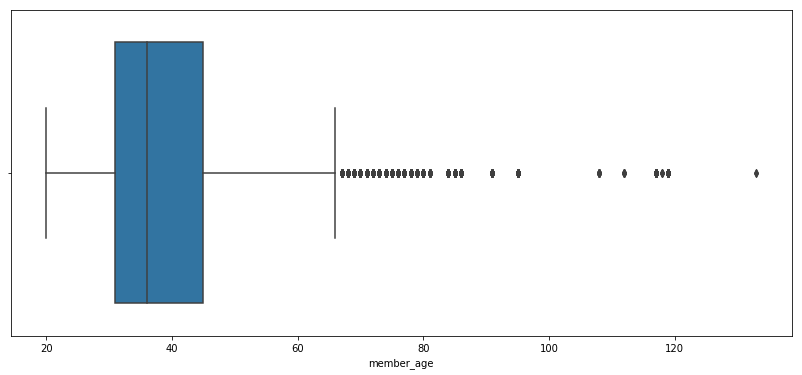

In [238]:
#plotting boxplot
plt.figure(figsize = [14,6])
sb.boxplot(data = bike_clean, x = 'member_age');

In [239]:
bike_clean['member_age'].describe()

count    453159.000000
mean         38.595213
std          10.513488
min          20.000000
25%          31.000000
50%          36.000000
75%          45.000000
max         133.000000
Name: member_age, dtype: float64

75% of the users lie between the age froup of 20 to 45. There are users more than 100 year old, so we will be include the age below and equal to 60.

In [240]:
bike_clean = bike_clean[bike_clean['member_age']<=60]

### Test

In [241]:
bike_clean['member_age'].describe()

count    436822.000000
mean         37.535365
std           8.958612
min          20.000000
25%          31.000000
50%          36.000000
75%          44.000000
max          60.000000
Name: member_age, dtype: float64

### Saving Dataframe

In [242]:
# Saving the dataframe to new_bike
bike_clean.to_csv("new_bike.csv", index=False)

### Since we have completed our data wrangling now we will start with analysis and visualization

In [243]:
# load our cleaned dataset
df = pd.read_csv('new_bike.csv')

In [244]:
#checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436822 entries, 0 to 436821
Data columns (total 16 columns):
duration_sec               436822 non-null int64
start_time                 436822 non-null object
end_time                   436822 non-null object
start_station_id           436822 non-null int64
start_station_name         436822 non-null object
start_station_latitude     436822 non-null float64
start_station_longitude    436822 non-null float64
end_station_id             436822 non-null int64
end_station_name           436822 non-null object
end_station_latitude       436822 non-null float64
end_station_longitude      436822 non-null float64
bike_id                    436822 non-null int64
user_type                  436822 non-null object
member_birth_year          436822 non-null int64
member_gender              436822 non-null object
member_age                 436822 non-null int64
dtypes: float64(4), int64(6), object(6)
memory usage: 53.3+ MB


### What is the structure of your dataset?

> There are 436822 rides in the dataset with 15 features like bike_id, user_type, member_age, start_station_name etc. Most variables are numeric in the dataset.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out and understanding the users' behaviors and personal details like:
Average riding duration
Average riding distance
Leisure or to go far away
Age groups of users
Genders
Weekly day distrubition etc. in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that age group and purpose of usage will make a strong effect in the dataset. I also think that the other investigations will clarify the customers' behaviors as well.

## Univariate Exploration

### Q1. Which age group uses the bike sharing service the most ?

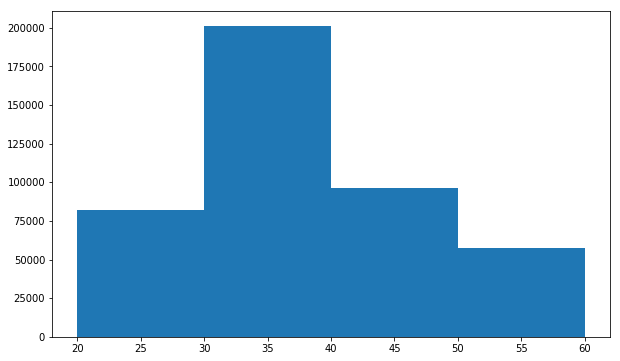

In [245]:
plt.figure(figsize = [10,6])
bin_edge = np.arange(20, df['member_age'].max()+10, 10)
plt.hist(data = df, x = 'member_age', bins = bin_edge);

From the above plot we can clearly see that maximum users belong to the 30-40 age group followed by 40-50.

### Q2. Which gender uses  bike sharing service the most ?

In [246]:
#creating a new dataframe
gender_type_df = df.groupby('member_gender').agg({'bike_id':'count'})

In [247]:
gender_type_df['perc'] = (gender_type_df['bike_id']/gender_type_df['bike_id'].sum())*100

In [248]:
gender_type_df

,bike_id,perc
member_gender,,
Female,96275,22.039870
Male,334421,76.557728
Other,6126,1.402402


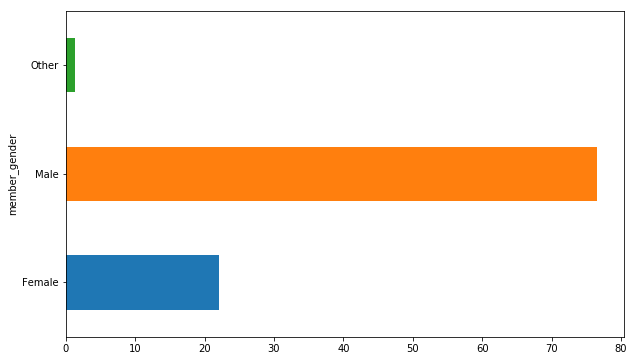

In [249]:
plt.figure(figsize = [10,6])
gender_type_df['perc'].plot(kind='barh');

From the above plot we can clearly see that 75.5% users are male, 22% are females and 1.4% are others

### Q3. Which user type uses  bike sharing service the most ?

In [250]:
user_type_df = df.groupby('user_type').agg({'bike_id':'count'})

In [251]:
user_type_df['perc'] = (user_type_df['bike_id']/user_type_df['bike_id'].sum())*100

In [252]:
user_type_df

,bike_id,perc
user_type,,
Customer,47917,10.969457
Subscriber,388905,89.030543


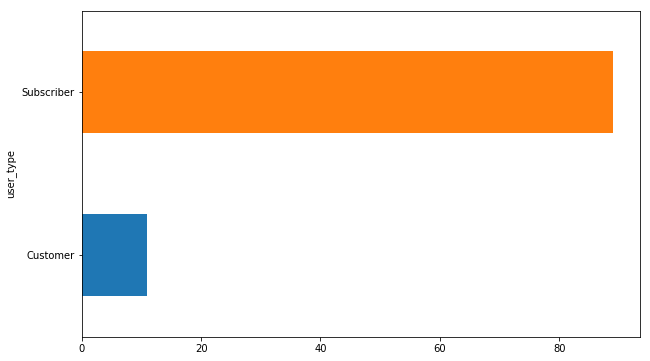

In [253]:
plt.figure(figsize = [10,6])
user_type_df['perc'].plot(kind='barh');

From the above plot we can clearly see that 89% are subscribers while 11% are customers.

### Q4. What is the monthly trend for the bike sharing service ?

In [254]:
#extracting month from timestamp
df['start_time']=pd.to_datetime(df['start_time'])
df['start_time_date']=df['start_time'].dt.date
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['start_time_month']=df['start_time'].dt.month.astype(int)

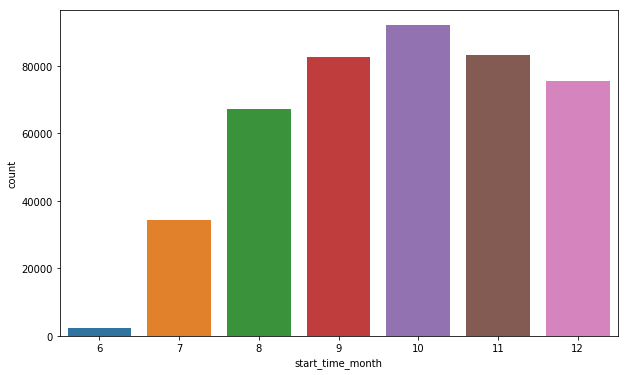

In [255]:
plt.figure(figsize = [10,6])
sb.countplot(data = df, x = 'start_time_month');

Here we can see that we have only 6 months data and we can say that its left skewed and there is slight dicrease at the end with most popular month being October.

### Q5. Which is the most popular starting hour for the trip ?

In [256]:
#extracting hour from start_time 
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['start_time_hour']=df['start_time'].dt.hour

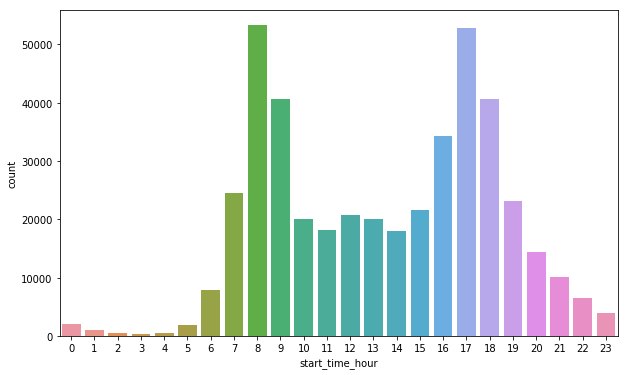

In [257]:
plt.figure(figsize = [10,6])
sb.countplot(data = df, x = 'start_time_hour');

From the above plot we can see that 8'o clock in the morning and 5'o clock in the evening are the most popular bike riding times.

### Q5. Which is the most popular day of the week for the trip ?

In [258]:
#extracting the weekday
df['start_time_weekday']=df['start_time'].dt.weekday_name
df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

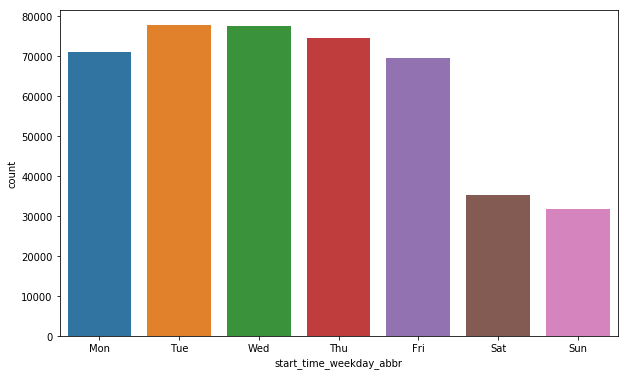

In [259]:
plt.figure(figsize = [10,6])
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df, x = 'start_time_weekday_abbr', order = week);

From the above plot we can see that Tuesday and Wednesday are the most popular days of the week.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  All these variables are important in order to understand the dataset and communicating the datafindings at the end and we checked almost all variables and are discussed below:

>We can talk about some of the variables. For example;
- There are 436822 rides in our dataset
- Users of 30-40 age group use bikesharing service the most.
- Males use the bike sharing service most with 75.5% while 22% are females.
- 89% are subscribers while 11% are customers.
- Weekends are less popular among users and they prefer to ride on Tuesday and Wednesday.
- 8am and 5pm are the peak hours for this service.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was wrangled as it contained member ages more than 100 years old which appeared to be outliers and required further investigation to be considered.
New fields were generated such as age, month, time in order to calculate them easily and understand the dataframe.

## Bivariate Exploration

### Q6. What is the relation between gender type and age ?

C:\Users\Faisal Ali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


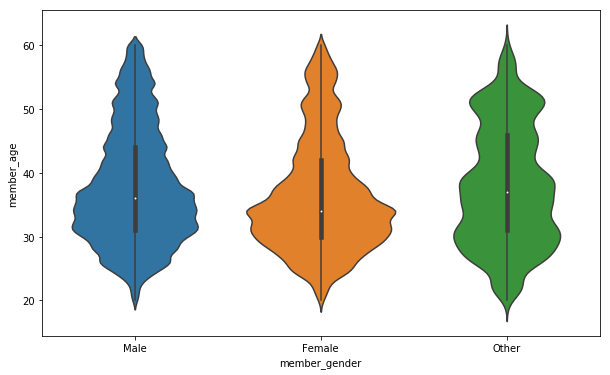

In [260]:
plt.figure(figsize = [10,6])
sb.violinplot(data = df, x = 'member_gender', y = 'member_age');

From the above violin plot we have observed that females in age group 30-35 use the service more as compared to men.

### Q7. Do the gender and start time show any pattern ?

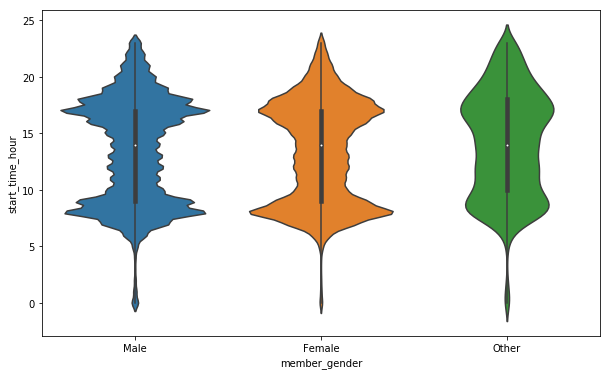

In [261]:
plt.figure(figsize = [10,6])
sb.violinplot(data = df, x = 'member_gender', y = 'start_time_hour');

From the above plot we see a similar pattern between males and females as both have peak times between 5-10 and 15-20.

### Q8. Is there any difference in user traffic between subscribers and customers on the basis of months?

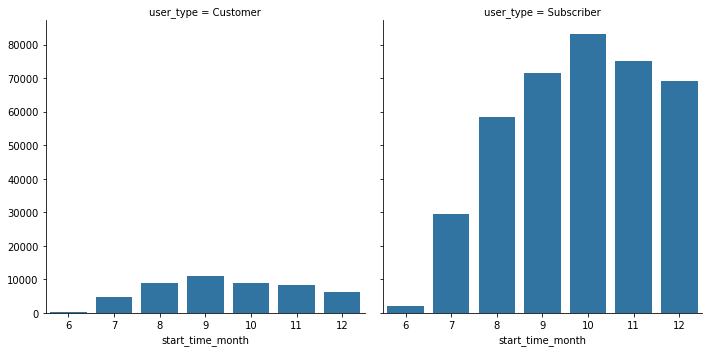

In [262]:
mnt = [6, 7, 8, 9, 10, 11, 12]
g = sb.FacetGrid(data = df, col = 'user_type', height = 5);
g.map(sb.countplot, 'start_time_month', order = mnt);

From the above plot we notice that for Customer the traffic is highest in September while for Subscriber its highest in October.

### Q9. Is there any difference in user traffic between subscribers and customers on the basis of weekdays ?

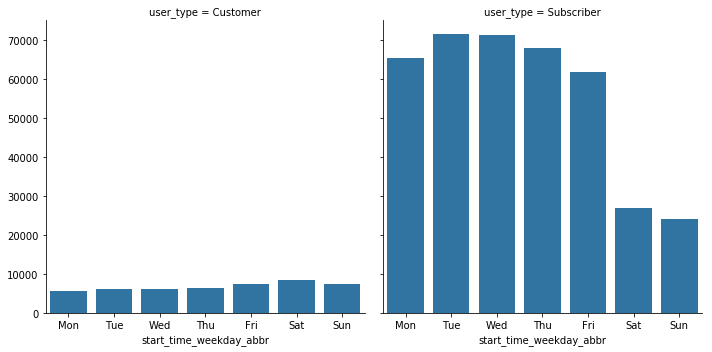

In [263]:
g = sb.FacetGrid(data = df, col = 'user_type', height = 5);
g.map(sb.countplot, 'start_time_weekday_abbr', order = week);

From the above plot we notice that for Customer the traffic is highest on Saturday while for Subscriber its highest Tuesday and we can also say that customer prefer weekends while subscriber prefer weekdays.

### Q10. Is there any difference in the average trip duration of a subscriber and customer ?

In [264]:
df['duration_min'] = df['duration_sec']/60

In [265]:
df.groupby('user_type')['duration_min'].mean()

user_type
Customer      31.357071
Subscriber    11.704995
Name: duration_min, dtype: float64

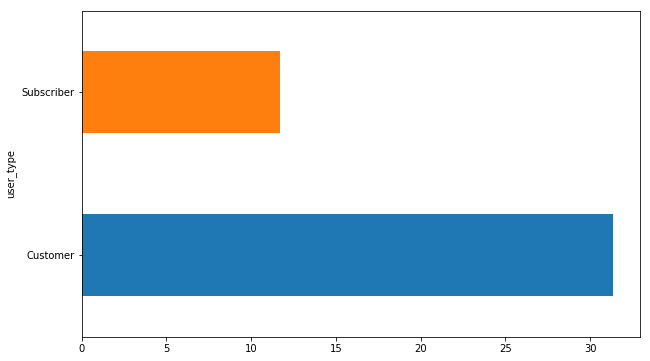

In [266]:
plt.figure(figsize = [10,6]);
df.groupby('user_type')['duration_min'].mean().plot(kind='barh');

From the above plot we found out that the average trip duration for subscriber is 11.7 minutes while for customer it is 31 minutes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We found some interesting relationship which are discussed below:
- Females in age group 30-35 use the service more as compared to men.
- A similar pattern between males and females is observed for trip start time as both have peak times between 5-10 and 15-20.
- We noticed that for Customer the traffic is highest in September while for Subscriber its highest in October.
- For Customer the traffic is highest on Saturday while for Subscriber its highest Tuesday and we can also say that customer prefer weekends while subscriber prefer weekdays.
- The average trip duration for subscriber is 11.7 minutes while for customer it is 31 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We observerved two intresting things, first is that the average trip duration time for customer is almost 3 times to that of a subscriber so we can say that a customer rides for a longer duartion and second is that customer ride more on weekend as compared to subscriber which ride most on the weekdays.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Q12. What is the relation between gender, ride time and age ?

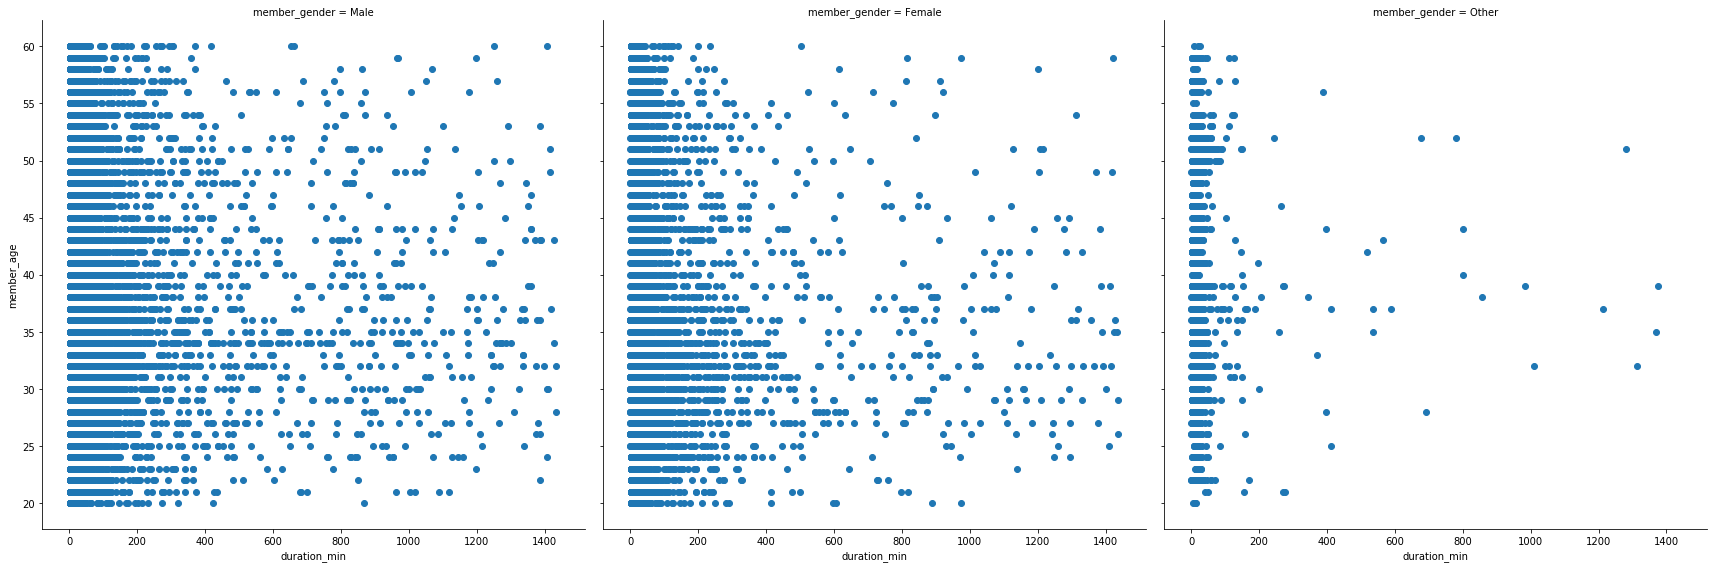

In [268]:
g = sb.FacetGrid(data = df, col = 'member_gender', height = 8);
g.map(plt.scatter, 'duration_min', 'member_age');
g.add_legend();

From the above plot we can say that the other gender rides for shorter duration among all age group while males ride for slightly higher duration than females.

### Q13. What is the relation between gender, weekday and age ?

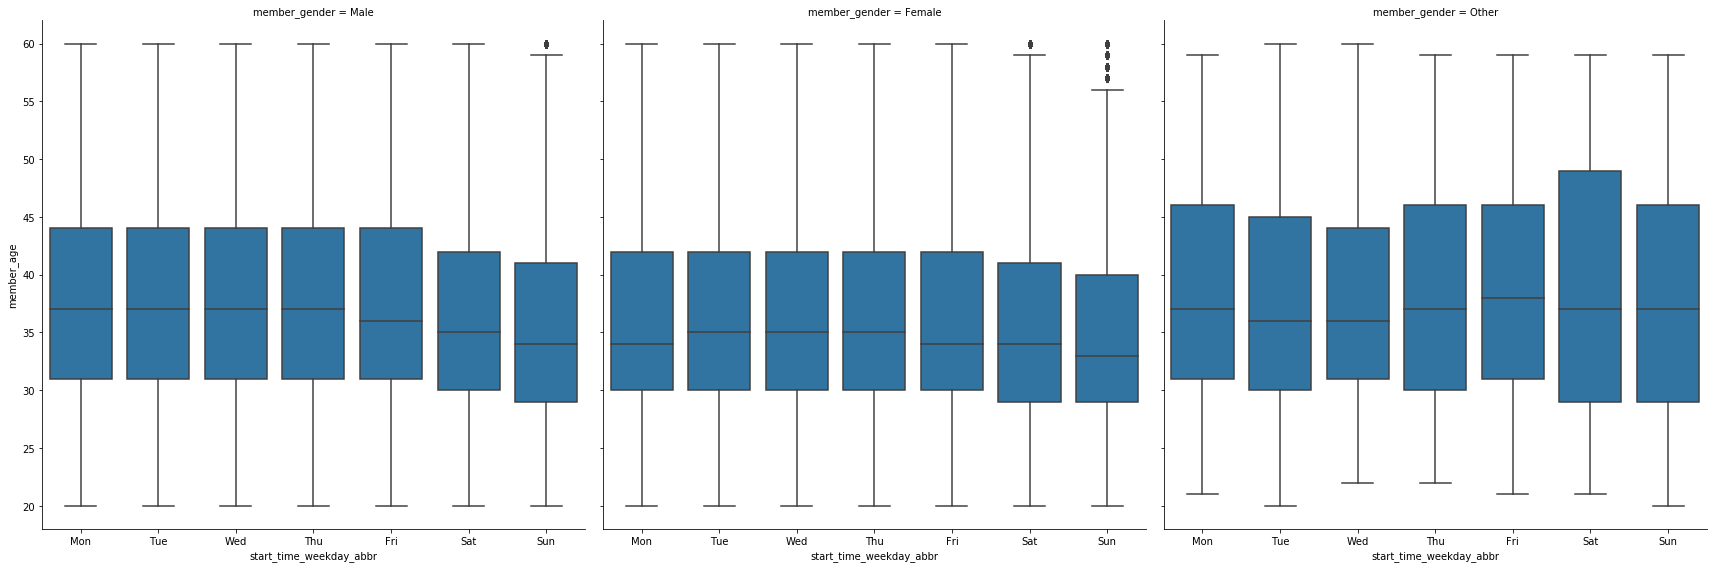

In [269]:
g = sb.FacetGrid(data = df, col = 'member_gender', height = 8);
g.map(sb.boxplot, 'start_time_weekday_abbr', 'member_age', order = week);
g.add_legend();

From the plot we can say that both younger males and females ride on Saturday and Sunday whereas there is ceratin abnormal behaviour in other gender.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We wanted to bifurcate data among gender, age and ride duration and found out an interesting thing that is that other gender type rides for very short duation throughout the whole age group, females ride for longer duration but as age increases they also ride for shorter duration but for men the number remain higher.

> We bifurcated data among gender, age and weekday and found out that both younger males and females ride more on Saturday and Sunday whereas there is ceratin abnormal behaviour in other gender.

### Were there any interesting or surprising interactions between features?

> We came to know about a very interesting thing that other gender rides for very short duration and younger male and female ride more on weekends.